<a href="https://colab.research.google.com/github/TonyN2060/Earthquakes/blob/main/Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import geopandas as gpd


In [2]:
data = pd.read_csv('/content/earthquake_data.csv')
data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [3]:
data.info

<bound method DataFrame.info of                                                  title  magnitude  \
0         M 7.0 - 18 km SW of Malango, Solomon Islands        7.0   
1             M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9   
2                                             M 7.0 -         7.0   
3                  M 7.3 - 205 km ESE of Neiafu, Tonga        7.3   
4                                             M 6.6 -         6.6   
..                                                 ...        ...   
777  M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...        7.7   
778              M 6.9 - 47 km S of Old Harbor, Alaska        6.9   
779             M 7.1 - 16 km NE of Port-Olry, Vanuatu        7.1   
780                      M 6.8 - Mindanao, Philippines        6.8   
781           M 7.5 - 21 km SE of Lukatan, Philippines        7.5   

            date_time  cdi  mmi  alert  tsunami  sig net  nst   dmin   gap  \
0    22-11-2022 02:03    8    7  green        1  768  us  117

In [4]:
data.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [5]:
data.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

**Title:** A textual description of the earthquake event.
magnitude: The magnitude of the earthquake, typically measured on the Richter scale.

**Date_time**: The date and time when the earthquake occurred.
cdi: Community Determined Intensity, representing the subjective assessment of how strongly people felt the earthquake.

**MM1**: Modified Mercalli Intensity, another measure of the earthquake's intensity based on observed effects.

**Alert**: An alert level associated with the earthquake (e.g., "green" indicating a lower impact).

**Tsunami**: Indicates whether the earthquake generated a tsunami (typically a binary value - 0 or 1).

**Sig**: A significance value associated with the earthquake.

**Net**: Network or organization reporting the earthquake.

**nst**: Number of reporting seismic stations.

**dmin**: Minimum distance to the earthquake's epicenter.

**gap**: Gap between seismic stations reporting the earthquake.

**MagType**: Type of magnitude measurement.

**depth**: Depth of the earthquake's focus below the Earth's surface.

**Latitude**: Latitude coordinates of the earthquake's epicenter.

**Longitude**: Longitude coordinates of the earthquake's epicenter
.
**Location**: A description of the earthquake's location.

**Continent**: The continent where the earthquake occurred.

**Country**: The country where the earthquake occurred.


In [6]:
data.isnull()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
778,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
779,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
780,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True


In [7]:
data.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [8]:

fig = px.scatter_geo(data,lat='latitude', lon='longitude',size = 'magnitude' )
fig.show()



In [9]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
magnitude,1.000000,0.209549,0.285552,-0.004726,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911
cdi,0.209549,1.000000,0.317937,0.160266,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048
mmi,0.285552,0.317937,1.000000,-0.147363,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803
tsunami,-0.004726,0.160266,-0.147363,1.000000,-0.015500,-0.600231,0.400752,0.116360,0.056814,-0.113209,-0.136778
sig,0.515871,0.479788,0.442423,-0.015500,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132
nst,0.113114,-0.175417,0.160417,-0.600231,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665
dmin,-0.091403,0.006554,-0.299074,0.400752,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875
gap,-0.110626,0.098143,-0.015723,0.116360,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623
depth,0.030644,-0.097891,-0.504439,0.056814,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986
latitude,-0.008552,0.129003,0.144883,-0.113209,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927


<ipython-input-10-eeaadd29a8c2>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



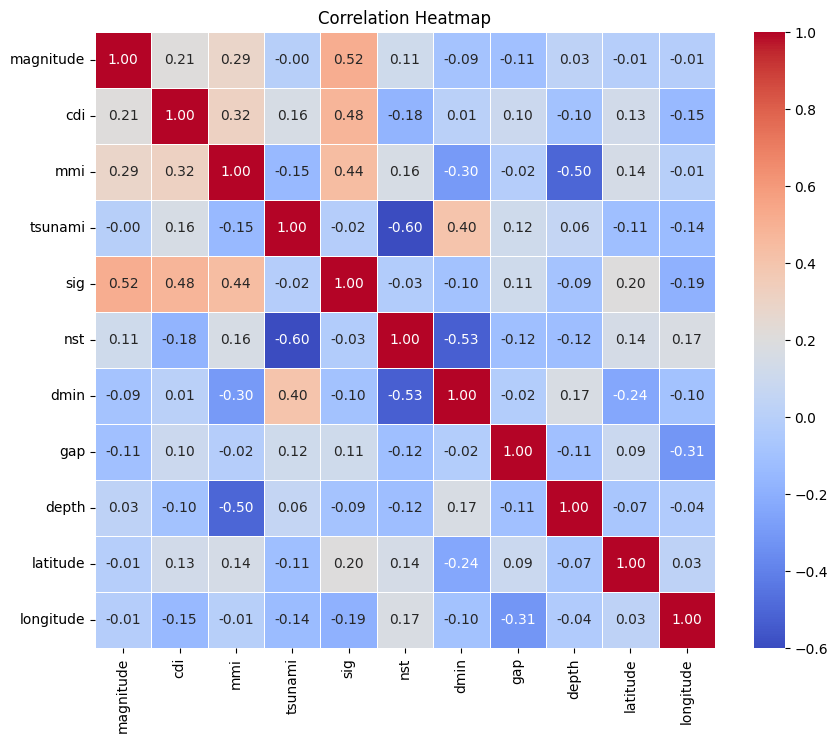

In [10]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Earthquakes uses a log scale to describe severity
# For example, earthquake magnitude of 7 means that it is 10 times as big from an earthquake magnitude 6.
# Magnitude 6 = 10^6
# Magnitude 7 = 10^7
# Therefore, the above graph may not represent the true severity
# Let us convert the magnitude value to the true amplitude scale and plot again

data['magnitude_scaled'] = data['magnitude'].apply(lambda x:10**x)

# Create scatter map
fig = px.scatter_geo(data, lat='latitude', lon='longitude', size='magnitude_scaled')
fig.show()

In [12]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.strftime("%Y")
data = data.sort_values(by=['year'])

fig = px.scatter_geo(data, lat='latitude', lon='longitude', size='magnitude_scaled', animation_frame='year')
fig.show()


In [13]:
earthquakes_per_country = data.groupby(['country'])['magnitude'].count().sort_values(ascending=False).reset_index()
earthquakes_per_country = earthquakes_per_country.rename(columns={'magnitude':"earthquakes_count"})
earthquakes_per_country

,country,earthquakes_count
0,Indonesia,110
1,Papua New Guinea,56
2,Chile,34
3,Vanuatu,27
4,Solomon Islands,22
5,Japan,21
6,Mexico,20
7,Peru,20
8,United States of America,17
9,Philippines,17


In [14]:
# Each country's earthquake epicenter
earthquakes_epicenter = data.groupby(['country'])['latitude', 'longitude'].mean().reset_index()
earthquakes_epicenter = earthquakes_epicenter.rename(columns={'latitude':"avg_latitude", 'longitude':'avg_longitude'})
earthquakes_epicenter


<ipython-input-14-c551e68ef85a>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,avg_latitude,avg_longitude
0,Afghanistan,36.464483,70.807617
1,Algeria,36.964000,3.634000
2,Antarctica,-60.751100,-35.006333
3,Argentina,-23.363300,-66.705800
4,Bolivia,-20.767067,-64.935167
5,Botswana,-22.678400,25.155800
6,Brazil,-8.796100,-71.336367
7,Canada,52.788000,-132.101000
8,Chile,-30.562129,-71.387906
9,Colombia,2.681250,-77.306500


In [15]:
combined_df = earthquakes_per_country.merge(earthquakes_epicenter, how='left', on='country')

# Create scatter map
fig = px.scatter_geo(combined_df, lat='avg_latitude', lon='avg_longitude', size='earthquakes_count', color="country")
fig.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = data[['magnitude', 'depth', ]]
y = data['tsunami']

X_train, X_test , y_train , y_test = train_test_split ( X, y , test_size = 0.25 ,random_state = 42 , )

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.5510204081632653
              precision    recall  f1-score   support

           0       0.61      0.74      0.67       119
           1       0.39      0.26      0.31        77

    accuracy                           0.55       196
   macro avg       0.50      0.50      0.49       196
weighted avg       0.52      0.55      0.53       196

Confusion Matrix:
[[88 31]
 [57 20]]
